In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("C:\Code\VN-Index\Raw Data\Vàng USD (Tháng).csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,09/13/2024,"2,576.50","2,556.52","2,586.18","2,556.52",NaN,0.69%
1,09/12/2024,"2,558.75","2,512.02","2,560.21","2,511.02",NaN,1.88%
2,09/11/2024,"2,511.44","2,515.70","2,529.40","2,501.02",NaN,-0.19%
3,09/10/2024,"2,516.12","2,506.84","2,518.57","2,500.16",NaN,0.43%
4,09/09/2024,"2,505.25","2,497.32","2,507.42","2,485.60",NaN,0.33%


In [4]:
df.fillna(0, inplace=True)

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
#df=df.set_index('Date')
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
df['Volume'] = df['Vol.'].replace({'B': '*1e9', 'M': '*1e6', 'K':'*1e3'}, regex=True).map(pd.eval).astype(float)
df['Volume'] = df['Volume'].apply(lambda x: f"{x:,.0f}")  # Định dạng số với dấu phẩy
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Volume
0,2024-09-13,2576.50,2556.52,2586.18,2556.52,0.0,0.69,2024,0
1,2024-09-12,2558.75,2512.02,2560.21,2511.02,0.0,1.88,2024,0
2,2024-09-11,2511.44,2515.70,2529.40,2501.02,0.0,-0.19,2024,0
3,2024-09-10,2516.12,2506.84,2518.57,2500.16,0.0,0.43,2024,0
4,2024-09-09,2505.25,2497.32,2507.42,2485.60,0.0,0.33,2024,0


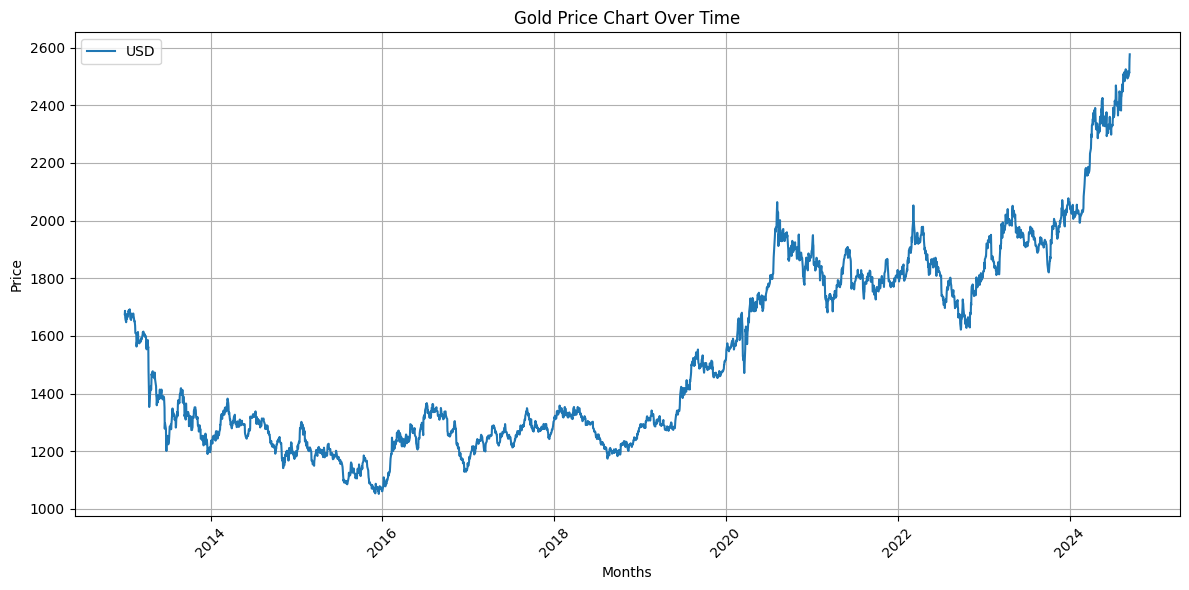

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='USD')
plt.title('Gold Price Chart Over Time')
plt.xlabel('Months')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()